## 0.0 IMPORTS

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import kurtosis, skew, norm

## 0.1 - HELPER FUNCTION (FUNÇÕES AUXILIARES)

## 0.2 - PATH DEFINITION

In [2]:
HOME_PATH = ''
RAW_DATA_PATH = ''
INTERIM_DATA_PATH = ''
FIGURE_PATH = ''

## 0.3 - LOAD DATA

In [36]:
base_fraude_raw1 = pd.read_csv('/home/valmir/Documentos/deteccao_fraude/data/raw/fraud_detection_dataset.csv')

## 1.0 - DATA DESCRIPITION

In [4]:
#base_fraude_raw1 = base_fraude_raw2.copy()
#base_fraude_raw1.to_csv(HOME_PATH+INTERIM_DATA_PATH+'base_fraude_raw1.csv')

## 1.1 - DATA FIELD'S

Os dados contidos nesta base de dados são simulados e compreendem 30 dias. Estas transações podem ser de diferentes tipo e foram executadas via mobile devices. As features contidas nesta base de dados são:

 - step - Passo: representa o total de horas transcorrido desde o início da simulação. Esta feature vai variar entre 1 e 744 (30 dias);

 - type: Tipo: tipo de transação(depósito, saque, débito, pagamento e transferencia);

 - amount: Quantia: total que foi transacionado;

 - nameOring: ClienteOrigem: cliente que iniciou atransação;

 - oldbalanceOrg: SaldoInicialOrigem: saldo da conta de origem antes da transação;

 - newbalanceOrig: SaldoFinalOrigem: saldo da conta de origem depois da transação;

 - nameDest: ClienteDestino: cliente de destino da transação;

 - oldbalandeDestino: SaldoInicialDestino: saldo da conta destino antes da transação;

 - newbalanceDest: SaldoFinalDestino: saldo da conta destino depois da transação;

 - isFraud: Fraude: flag que define se a transação é fraudolenta ou não. Nesta simulação de fraude é a assumir se 'a conta do usuario foi   esvaziada e transferindo o dinherio para outra conta e depois sacado
 
 - IssFlaggedFraud: SinalizadaFraude: automaticamente categorizada como fraude pelo banco por fraude por tentar trasnferir mais de 200 mil em uma única conta


## 1.2 - RENAME COLUMNS

In [5]:
base_fraude_raw1.rename(columns={'step':'Passos', 'type':'Tipo', 'amount': 'Quantia',
                                'nameOrig':'ClienteOrigem', 'oldbalanceOrg': 'SaldoInicalOrig',
                                'newbalanceOrig':'SaldoFinalOrig', 'nameDest':'ClienteDest',
                                'oldbalanceDest':'SaldoInicialDest', 'newbalanceDest':'SaldoFinalDest',
                                'isFraud':'Fraude', 'isFlaggedFraud':'SinalizadaFraude'}, inplace=True)
base_fraude_raw1.dtypes

Passos                int64
Tipo                 object
Quantia             float64
ClienteOrigem        object
SaldoInicalOrig     float64
SaldoFinalOrig      float64
ClienteDest          object
SaldoInicialDest    float64
SaldoFinalDest      float64
Fraude                int64
SinalizadaFraude      int64
dtype: object

## 1.3 - DATA DIMENSIONS

In [6]:
num_linhas, num_colunas = base_fraude_raw1.shape

print('Numero de linhas', num_linhas)
print('Numero de colunas', num_colunas)

Numero de linhas 557123
Numero de colunas 11


## 1.4 - DATA TYPE

In [7]:
base_fraude_raw1.dtypes

Passos                int64
Tipo                 object
Quantia             float64
ClienteOrigem        object
SaldoInicalOrig     float64
SaldoFinalOrig      float64
ClienteDest          object
SaldoInicialDest    float64
SaldoFinalDest      float64
Fraude                int64
SinalizadaFraude      int64
dtype: object

## 1.5 CHANGE TYPE

#### Não houve nenhuma mudança nos tipos de variaveis nessa etapa, pois todas as features se encontravam com seus tipos bem definidos

## 1.6 - CHECK N.A.

### Não foi encontrado nenhum valor nulo nesse Dataset

In [8]:
base_fraude_raw1.isnull().sum()

Passos              0
Tipo                0
Quantia             0
ClienteOrigem       0
SaldoInicalOrig     0
SaldoFinalOrig      0
ClienteDest         0
SaldoInicialDest    0
SaldoFinalDest      0
Fraude              0
SinalizadaFraude    0
dtype: int64

In [9]:
base_fraude_raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557123 entries, 0 to 557122
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Passos            557123 non-null  int64  
 1   Tipo              557123 non-null  object 
 2   Quantia           557123 non-null  float64
 3   ClienteOrigem     557123 non-null  object 
 4   SaldoInicalOrig   557123 non-null  float64
 5   SaldoFinalOrig    557123 non-null  float64
 6   ClienteDest       557123 non-null  object 
 7   SaldoInicialDest  557123 non-null  float64
 8   SaldoFinalDest    557123 non-null  float64
 9   Fraude            557123 non-null  int64  
 10  SinalizadaFraude  557123 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 46.8+ MB


## 1.7 - FILL OUT N.A.

### Não havendo nenhum valor faltante nesse Dataset, não foi nescessario nenhum metodo de preenchimento ou exclusão dos mesmos

## 1.8 DISCRIPTIVE STATISTICAL

Medidas de tendencia central - 
 - Media
 - Mediana
 

Medidas de Dispersão

- Skewness
- Kurtosis
- Desvio Padrão
- Range (alcance)
- Min
- Max

In [10]:
# Medidas de Tendencia - Media e Mediana
tendencia = base_fraude_raw1['Quantia'].describe().loc[['mean', '50%']]
print(tendencia)


mean    163897.760907
50%      74913.810000
Name: Quantia, dtype: float64


In [37]:
base_fraude_raw1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9920.52,C764826684,0.0,0.0,M1940055334,0.0,0.0,0,0
1,1,PAYMENT,3448.92,C2103763750,0.0,0.0,M335107734,0.0,0.0,0,0
2,1,PAYMENT,4206.84,C215078753,0.0,0.0,M1757317128,0.0,0.0,0,0
3,1,PAYMENT,5885.56,C840514538,0.0,0.0,M1804441305,0.0,0.0,0,0
4,1,PAYMENT,5307.88,C1768242710,0.0,0.0,M1971783162,0.0,0.0,0,0


In [32]:
selected_feature = base_fraude_raw1['price']

In [33]:
kurt = kurtosis(selected_feature)
skewness = skew(selected_feature)

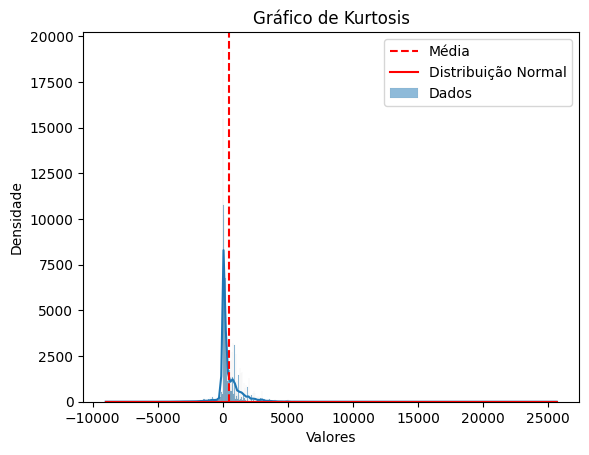

In [35]:
sns.histplot(selected_feature, kde=True, label='Dados')
plt.axvline(np.mean(selected_feature), color='r', linestyle='--', label='Média')
plt.plot(np.linspace(np.min(selected_feature), np.max(selected_feature), 100), norm.pdf(np.linspace(np.min(selected_feature), np.max(selected_feature), 100), np.mean(selected_feature), np.std(selected_feature)), 'r-', label='Distribuição Normal')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.title('Gráfico de Kurtosis')
plt.legend()
plt.show()